# Analisis Retail Supply Chain Sales Dataset

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Set visualization style
sns.set(style="whitegrid")

In [14]:
# Cargar el archivo
file_path = r"D:\Python\Retail Supply Chain Sales Dataset\Retail-Supply-Chain-Sales-Dataset.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

In [15]:
# Definir los nombres de las hojas a cargar
sheet_names = ["Retails Order Full Dataset", "Calendar Table"]

In [17]:
# Cargar hojas en un diccionario de DataFrames
data = {name: pd.read_excel(file_path, sheet_name=name) for name in sheet_names}

In [18]:
# Acceder a las hojas individuales
retail_df = data["Retails Order Full Dataset"]
calendar_df = data["Calendar Table"]

In [21]:
retail_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Retail Sales People,Product ID,Category,Sub-Category,Product Name,Returned,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Cassandra Brandow,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,Not,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Cassandra Brandow,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Not,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Anna Andreadi,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,Not,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Cassandra Brandow,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,Not,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Cassandra Brandow,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,Not,22.3680,2,0.20,2.5164


In [26]:
calendar_df.head()

,Date,Year,Quarter,Quarter (Q),Quarter & Year,Month,Month Name,Month & Year,Week of Year,Week of Year (W),Day of Week,Day Name
0,2016-07-01,2016,3,Q3,2016 - Q3,7,Jul,Jul 2016,27,Week 27,5,Friday
1,2016-07-02,2016,3,Q3,2016 - Q3,7,Jul,Jul 2016,27,Week 27,6,Saturday
2,2016-07-03,2016,3,Q3,2016 - Q3,7,Jul,Jul 2016,27,Week 27,7,Sunday
3,2016-07-04,2016,3,Q3,2016 - Q3,7,Jul,Jul 2016,28,Week 28,1,Monday
4,2016-07-05,2016,3,Q3,2016 - Q3,7,Jul,Jul 2016,28,Week 28,2,Tuesday


Variables de Interés:
1. Ventas (Sales), Ganancias (Profit), Cantidad (Quantity): Métricas clave para análisis de rentabilidad.
2. Fechas (Order Date, Ship Date, Date): Útiles para análisis temporal.
3. Categorías y Subcategorías (Category, Sub-Category): Ayudan a segmentar productos.
4. Regiones y Países (Country, Region): Permiten análisis geoespaciales.

In [28]:
# Cargar las hojas en DataFrames independientes
retail_df = pd.read_excel(file_path, sheet_name="Retails Order Full Dataset")
calendar_df = pd.read_excel(file_path, sheet_name="Calendar Table")

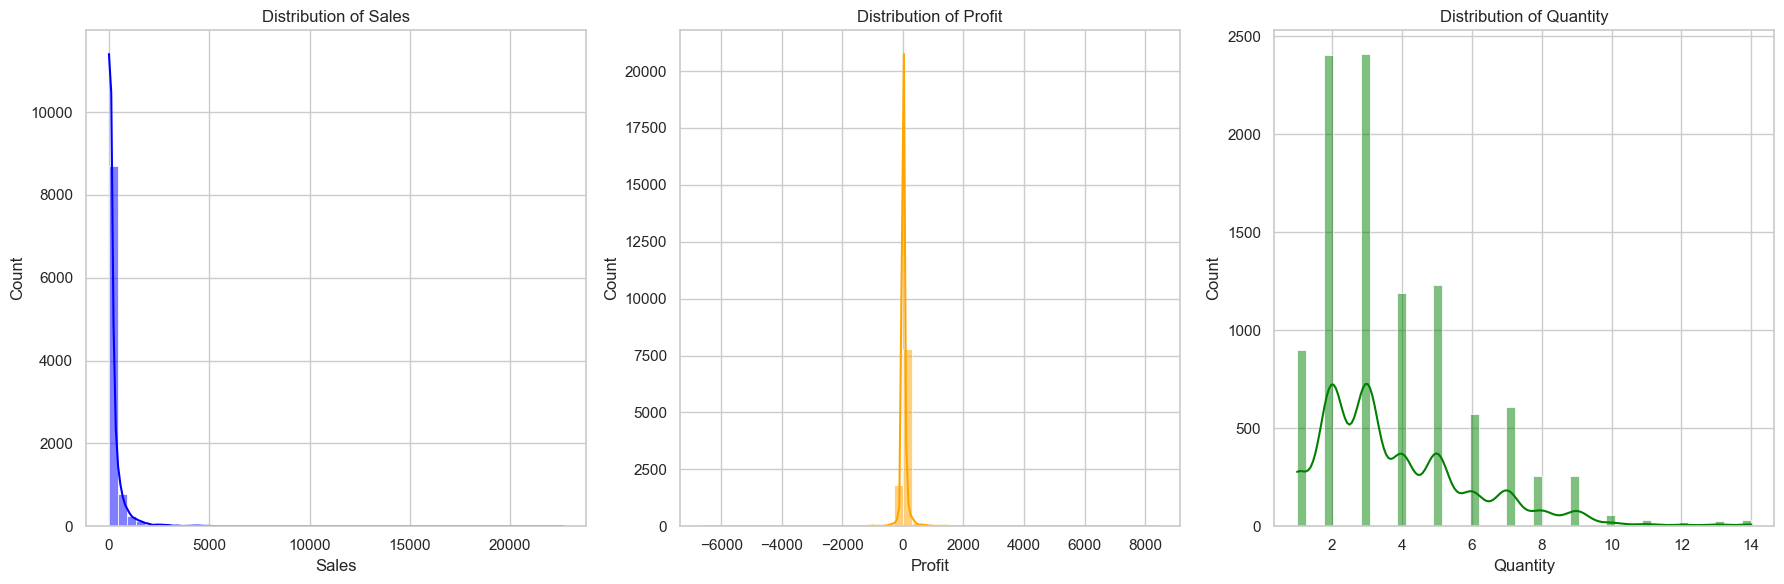

In [45]:
# Visualización de las Variables o Características Clase
key_features = {'Sales': 'blue', 'Profit': 'orange', 'Quantity': 'green'}

plt.figure(figsize=(18, 6))
for i, (feature, color) in enumerate(key_features.items(), 1):
    plt.subplot(1, 3, i)
    sns.histplot(retail_df[feature], bins=50, kde=True, color=color)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

1. Distribución de Sales (Ventas):
- La distribución está muy sesgada hacia la derecha (sesgo positivo)
- La mayoría de las ventas son de bajo valor.
- Hay algunos valores atípicos (ventas muy altas) que podrían indicar grandes transacciones o ventas excepcionales.
2. Distribución de Profit (Ganancias):
- La distribución es centrada alrededor de 0, con valores negativos y positivos. Tiene forma de campana muy estrecha.
- Las ganancias se concentran cerca de cero, indicando que muchas transacciones tienen margen de ganancia bajo o incluso pérdidas.
- Existen ganancias y pérdidas extremas que podrían ser relevantes para un análisis financiero.
3. Distribución de Quantity (Cantidad):
- La distribución está sesgada a la derecha, con un pico alto en cantidades pequeñas (1-3 unidades).
- La mayoría de los pedidos son de pequeñas cantidades.
- La frecuencia disminuye a medida que aumenta la cantidad, lo que sugiere que grandes pedidos son menos comunes.


In [49]:
# Limpieza de Datos e Ingeniería de Características
# Convertir múltiples columnas a datetime
date_columns = ['Order Date', 'Ship Date']
retail_df[date_columns] = retail_df[date_columns].apply(pd.to_datetime, errors='coerce')

# Detectar duplicados
num_duplicates = retail_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Eliminar filas con fechas nulas (NaT) en 'Order Date'
retail_df = retail_df.dropna(subset=['Order Date'])

# Crear nuevas características a partir de 'Order Date'
retail_df['Order Year'] = retail_df['Order Date'].dt.year
retail_df['Order Month'] = retail_df['Order Date'].dt.month
retail_df['Order Month Name'] = retail_df['Order Date'].dt.strftime('%B')

# Mostrar las primeras filas con las nuevas características
display(retail_df[['Order ID', 'Order Date', 'Order Year', 'Order Month', 'Order Month Name']].head())

Number of duplicate rows: 0


,Order ID,Order Date,Order Year,Order Month,Order Month Name
0,CA-2016-152156,2016-08-11,2016,8,August
1,CA-2016-152156,2016-08-11,2016,8,August
2,CA-2016-138688,2016-12-06,2016,12,December
3,US-2015-108966,2015-11-10,2015,11,November
4,US-2015-108966,2015-11-10,2015,11,November


In [51]:
# Crear nuevas características a partir de 'Order Date'
retail_df[['Order Year', 'Order Month', 'Order Month Name']] = retail_df['Order Date'].apply(
    lambda x: pd.Series([x.year, x.month, x.strftime('%B')])
)

In [52]:
print(retail_df[['Order Date', 'Order Year', 'Order Month', 'Order Month Name']].head())

  Order Date  Order Year  Order Month Order Month Name
0 2016-08-11        2016            8           August
1 2016-08-11        2016            8           August
2 2016-12-06        2016           12         December
3 2015-11-10        2015           11         November
4 2015-11-10        2015           11         November


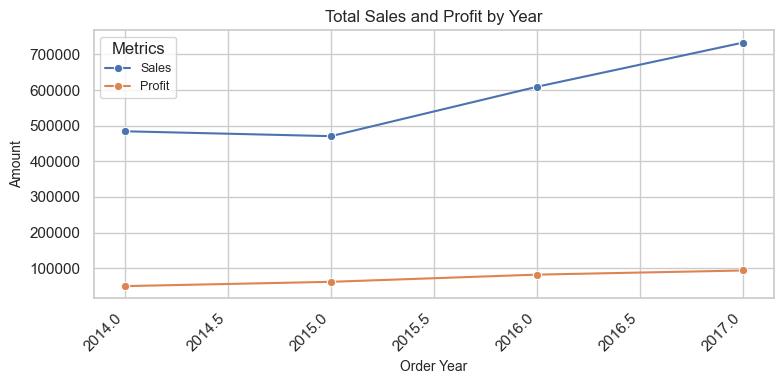

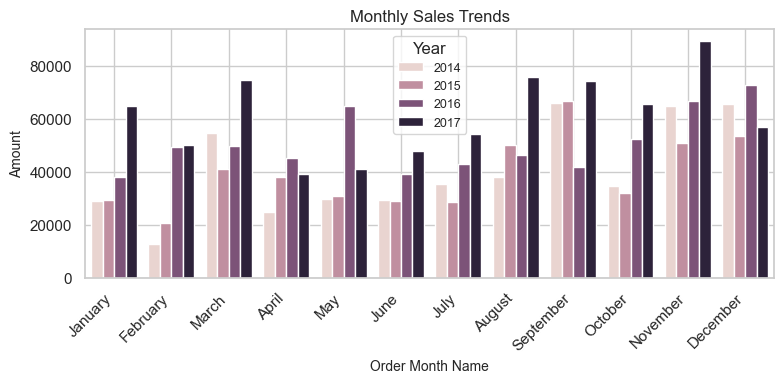

In [99]:
# Estacionalidad de Ventas - Rendimiento de Ventas y Ganancias
def plot_combined_trend(data, x, y_columns, labels, title, chart_type='line', hue=None, figsize=(8, 4), rotation=45):
    plt.figure(figsize=figsize)
    if chart_type == 'bar':
        sns.barplot(data=data, x=x, y=y_columns[0], hue=hue, errorbar=None)  # Gráfico de barras
    else:  # Line plot para múltiples columnas
        for y, label in zip(y_columns, labels):
            sns.lineplot(data=data, x=x, y=y, marker='o', label=label)
    
    plt.title(title, fontsize=12)
    plt.xlabel(x, fontsize=10)
    plt.ylabel('Amount', fontsize=10)
    plt.xticks(rotation=rotation, ha='right')  # Rotar el eje X
    if hue or chart_type != 'bar':
        plt.legend(title='Metrics' if hue is None else 'Year', fontsize=9)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Análisis de ventas y ganancias por año
yearly_sales = retail_df.groupby('Order Year')[['Sales', 'Profit']].sum().reset_index()

# Graficar Sales y Profit en el mismo gráfico
plot_combined_trend(yearly_sales, x='Order Year', 
                    y_columns=['Sales', 'Profit'], 
                    labels=['Sales', 'Profit'], 
                    title='Total Sales and Profit by Year', chart_type='line')

# Análisis de ventas por mes y año
monthly_sales = (retail_df.groupby(['Order Year', 'Order Month Name'])['Sales']
                 .sum().reset_index())

# Ordenar los meses automáticamente
month_order = pd.date_range("2024-01-01", "2024-12-31", freq="MS").strftime("%B")
monthly_sales['Order Month Name'] = pd.Categorical(monthly_sales['Order Month Name'], 
                                                   categories=month_order, ordered=True)

# Gráfico de ventas mensuales (barras agrupadas por año)
plot_combined_trend(monthly_sales, x='Order Month Name', 
                    y_columns=['Sales'], 
                    labels=['Sales'], 
                    title='Monthly Sales Trends', chart_type='bar', hue='Order Year', rotation=45)

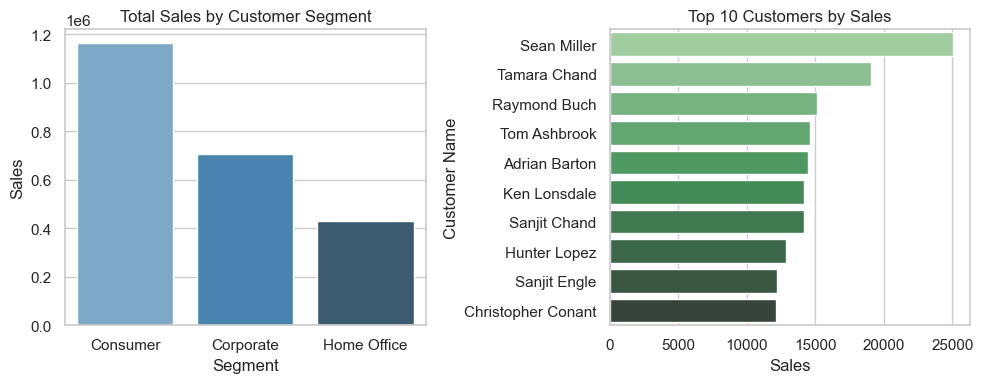

In [110]:
# Análisis de segmentación de clientes: Ventas y clientes principales
def plot_bar_charts(dataframes, x_columns, y_columns, titles, palettes, figsize=(10, 4)):
    plt.figure(figsize=figsize)
    for i, (df, x, y, title, palette) in enumerate(zip(dataframes, x_columns, y_columns, titles, palettes), 1):
        plt.subplot(1, 2, i)
        sns.barplot(data=df, x=x, y=y, hue=x if x == 'Segment' else y, palette=palette, legend=False)
        plt.title(title)
        plt.xlabel(x.replace('_', ' ').title())
        plt.ylabel(y.replace('_', ' ').title())
    plt.tight_layout()
    plt.show()

# Preparación de datos
segment_sales = retail_df.groupby('Segment', as_index=False)[['Sales', 'Profit']].sum()
top_customers = retail_df.groupby('Customer Name', as_index=False)['Sales'].sum().nlargest(10, 'Sales')

# Gráficos combinados
plot_bar_charts(
    dataframes=[segment_sales, top_customers],
    x_columns=['Segment', 'Sales'],
    y_columns=['Sales', 'Customer Name'],
    titles=['Total Sales by Customer Segment', 'Top 10 Customers by Sales'],
    palettes=['Blues_d', 'Greens_d']
)

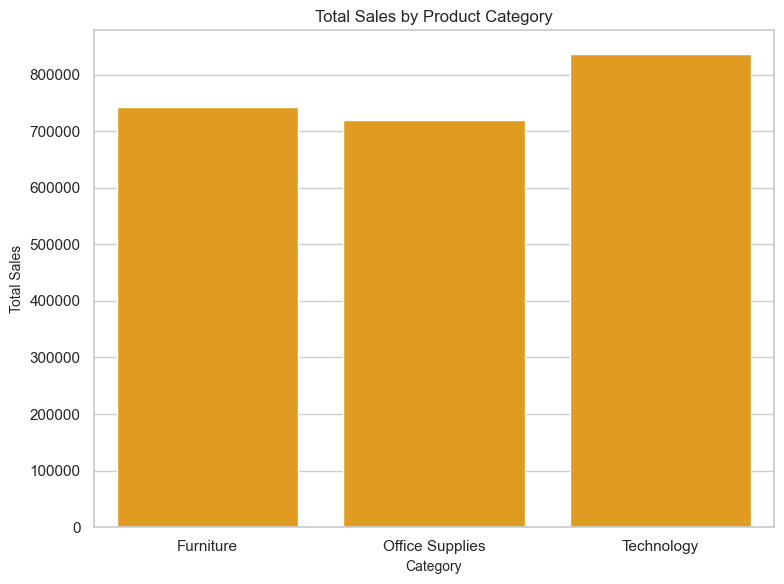

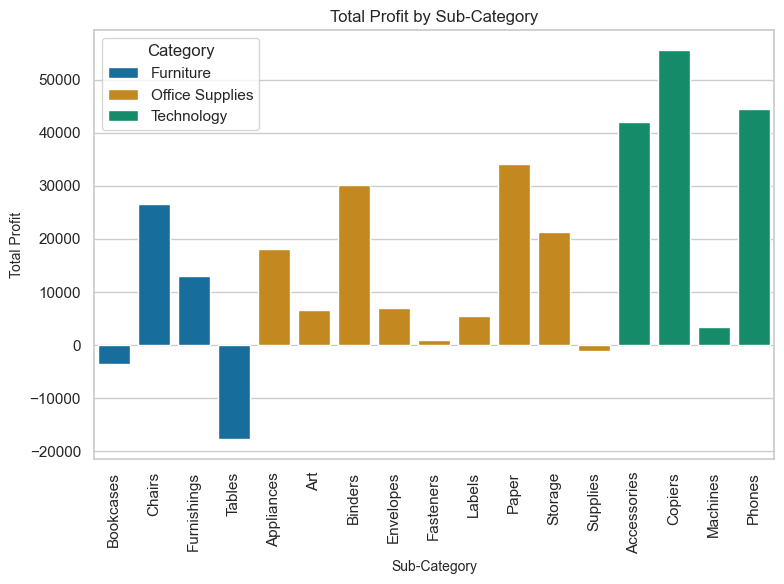

In [136]:
# Análisis de categorías de productos
def plot_sales_and_profit(data, x, y, hue=None, title='', ylabel='', figsize=(8, 6), rotation=0):
    plt.figure(figsize=figsize)
    if hue:  
        sns.barplot(data=data, x=x, y=y, hue=hue, palette='colorblind', dodge=False)
        plt.legend(title=hue.replace('_', ' ').title())
    else: 
        sns.barplot(data=data, x=x, y=y, color='orange')
    plt.title(title, fontsize=12)
    plt.xlabel(x.replace('_', ' ').title(), fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()

# Agrupación y cálculo de ventas y ganancias
category_sales = retail_df.groupby('Category', as_index=False)[['Sales', 'Profit']].sum()
subcategory_sales = retail_df.groupby(['Category', 'Sub-Category'], as_index=False)[['Sales', 'Profit']].sum()

# Gráficos
plot_sales_and_profit(category_sales, x='Category', y='Sales', 
                      title='Total Sales by Product Category', ylabel='Total Sales')

plot_sales_and_profit(subcategory_sales, x='Sub-Category', y='Profit', hue='Category',
                      title='Total Profit by Sub-Category', ylabel='Total Profit', rotation=90)

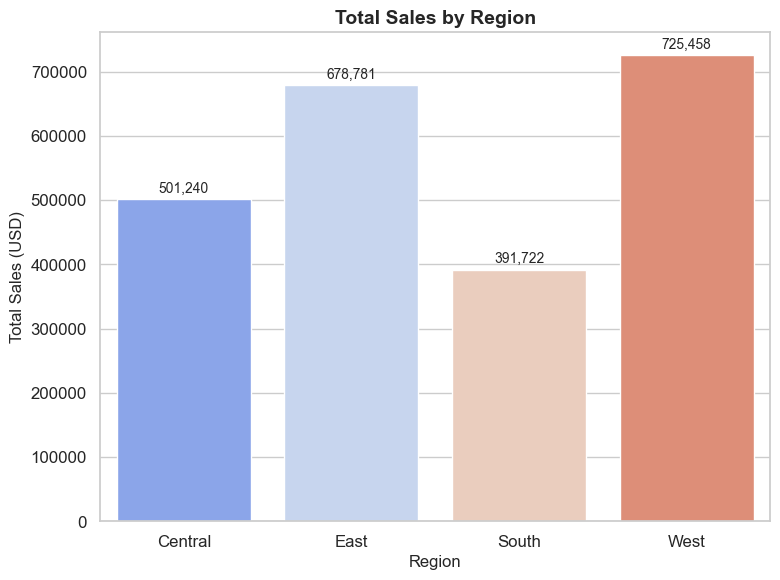

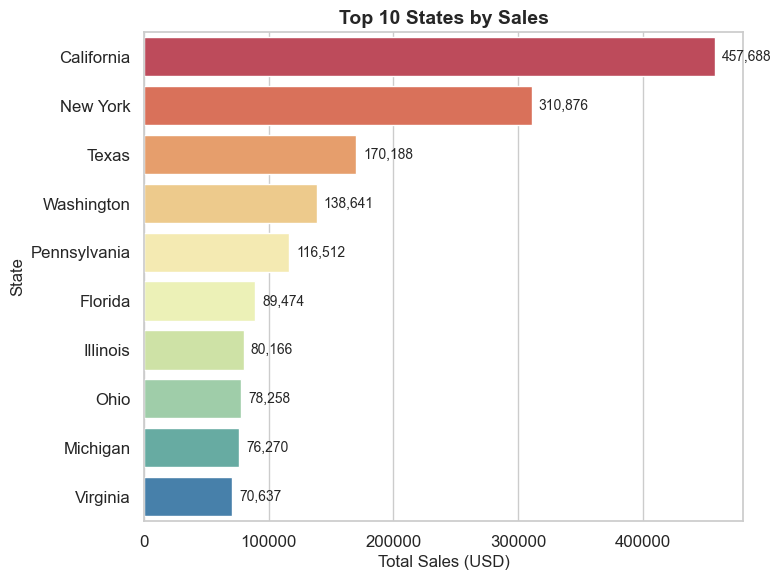

In [ ]:
# Análisis Geográfico de las Ventas y Ganancias
# Configuración global de estilo
sns.set(style="whitegrid", font_scale=1.1)

# Agrupar por Región y calcular ventas y ganancias
region_sales = retail_df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

# Gráfico: Ventas por Región
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=region_sales, x='Region', y='Sales', palette='coolwarm', hue='Region', legend=False)

# Mejorar apariencia
plt.title('Total Sales by Region', fontsize=14, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)

# Etiquetas de valor en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, xytext=(0, 8), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Agrupar por Estado y calcular las ventas totales (Top 10)
state_sales = (retail_df.groupby('State')[['Sales', 'Profit']]
               .sum().sort_values(by='Sales', ascending=False)
               .head(10).reset_index())

# Gráfico: Top 10 Estados por Ventas
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=state_sales, x='Sales', y='State', palette='Spectral', hue='State', legend=False)

# Mejorar apariencia
plt.title('Top 10 States by Sales', fontsize=14, weight='bold')
plt.xlabel('Total Sales (USD)', fontsize=12)
plt.ylabel('State', fontsize=12)

# Etiquetas de valor en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=10, xytext=(5, 0), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

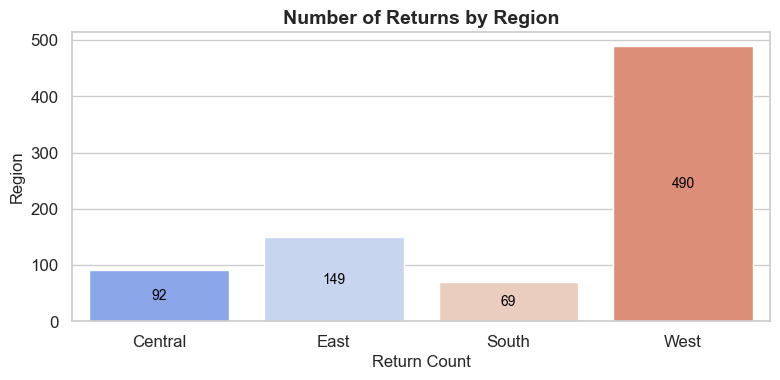

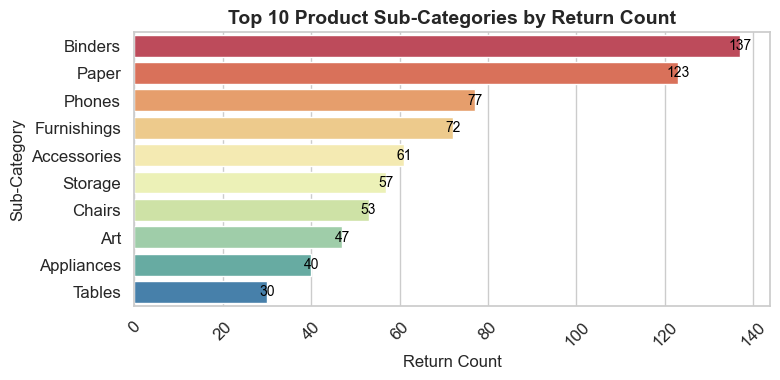

In [152]:
# Análisis de Devoluciones
# Función para graficar devoluciones
def plot_returns(data, group_by, top_n=None, title='', x_label='', y_label='', palette='Spectral', figsize=(8, 4), rotation=0):
    # Filtrar solo las devoluciones y agrupar
    return_data = (data[data['Returned'] == 'Yes']
                   .groupby(group_by, as_index=False)['Returned']
                   .count()
                   .rename(columns={'Returned': 'Return Count'}))
    
    # Filtrar las top_n si es necesario
    if top_n:
        return_data = return_data.sort_values(by='Return Count', ascending=False).head(top_n)
    
    # Crear el gráfico
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=return_data, 
                     x='Return Count' if top_n else group_by, 
                     y=group_by if top_n else 'Return Count', 
                     hue=group_by, palette=palette, legend=False)
    
    # Configuración del título y etiquetas
    plt.title(title, fontsize=14, weight='bold')
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.xticks(rotation=rotation)
    
    # Etiquetas en las barras
    for p in ax.patches:
        value = f'{p.get_width():,.0f}' if top_n else f'{p.get_height():,.0f}'
        plt.text(p.get_width() if top_n else p.get_x() + p.get_width() / 2, 
                 p.get_y() + p.get_height() / 2, 
                 value, ha='center', va='center', fontsize=10, color='black')
    
    plt.tight_layout()
    plt.show()

# Análisis de devoluciones por Región
plot_returns(data=retail_df, group_by='Region',
             title='Number of Returns by Region', 
             x_label='Return Count', y_label='Region', 
             palette='coolwarm')

# Análisis de devoluciones por Sub-Categoría (Top 10)
plot_returns(data=retail_df, group_by='Sub-Category', top_n=10,
             title='Top 10 Product Sub-Categories by Return Count', 
             x_label='Return Count', y_label='Sub-Category', 
             palette='Spectral', figsize=(8, 4), rotation=45)

# Resumen del Análisis de los Datos
El análisis muestra que Tecnología lidera en ventas y rentabilidad, mientras que Mobiliario, especialmente Librerías y Mesas, tiene altos volúmenes de venta pero baja rentabilidad. Se identifican picos de desempeño en noviembre y diciembre, con el segmento Consumidor como principal generador de ingresos. Regionalmente, las regiones Oeste y Este sobresalen en ventas, aunque la Región Oeste enfrenta altas tasas de devoluciones en categorías como Carpetas, Papel y Teléfonos.

Para abordar estos desafíos, se recomienda implementar un modelo de pronóstico de demanda que optimice inventarios y un sistema de predicción de devoluciones basado en factores como categoría de producto, región y segmento de cliente. Además, se sugiere mejorar la calidad del producto y la atención al cliente en categorías problemáticas, lo que contribuirá a incrementar la eficiencia operativa y la rentabilidad del negocio


In [170]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [171]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ----- ---------------------------------- 1.8/13.3 MB 16.9 MB/s eta 0:00:01
   ----------------- ---------------------- 5.8/13.3 MB 16.8 MB/s eta 0:00:01
   --------------------------- ------------ 9.2/13.3 MB 16.3 MB/s eta 0:00:01
   --------------------------------- ------ 11.3/13.3 MB 14.4 MB/s eta 0:00:01
   -------------------------------------- - 12.8/13.3 MB 13.0 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 12.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 7.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [173]:
pip install ipywidgets

   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 14.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Sales Data for Forecasting:


,ds,y
0,2014-01-02,468.900
1,2014-01-03,2203.151
2,2014-01-04,119.888
3,2014-01-06,5188.520
4,2014-01-07,601.024


01:49:57 - cmdstanpy - INFO - Chain [1] start processing
01:49:59 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 800x600 with 0 Axes>

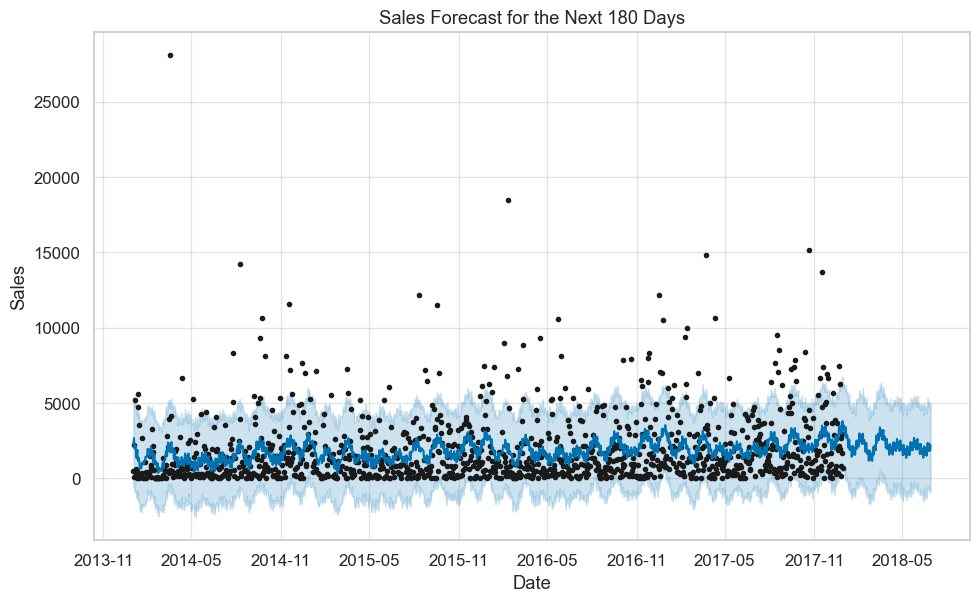

Forecasted Sales Data:


,ds,yhat,yhat_lower,yhat_upper
1412,2018-06-24,2170.667333,-667.724065,5098.133984
1413,2018-06-25,2308.541165,-583.803750,5109.324460
1414,2018-06-26,2217.506420,-805.821648,4957.821556
1415,2018-06-27,1828.264098,-942.863528,4578.605306
1416,2018-06-28,2204.044540,-764.932788,4959.223421


In [206]:
# Import necessary libraries
from prophet import Prophet  # Updated import statement

# Prepare data for Prophet
sales_by_date = retail_df.groupby('Order Date')['Sales'].sum().reset_index()
sales_by_date.columns = ['ds', 'y']  # Prophet requires these column names

# Display the first few rows of the prepared data
print("Sales Data for Forecasting:")
display(sales_by_date.head())

# Initialize the Prophet model
model = Prophet()

# Fit the model to the data
model.fit(sales_by_date)

# Create a dataframe for future dates (predicting the next 180 days)
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

# Visualize the forecast
plt.figure(figsize=(8, 6))
model.plot(forecast)
plt.title('Sales Forecast for the Next 180 Days')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Display the forecasted data
print("Forecasted Sales Data:")
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Hice varios ensayos con diferentes modelos en esta primera etapa del Análisis Exploratorio de DAtos, como por ejemplo un modelo clásico ARIMA, un modelo basado en Machine Learning - Random Forest (Este lo usare más adelante cuando entrene el modelo predictivo), uno modelo con Gradient Boosting (Me servira para una comparación), otro modelo para XGBoost (Me servira para una comparación), un modelo con Redes Neuronales LSTM y finalmente un modelo con suavización usando Holt-Winters, pero despues de varias pruebas de ensayo y error, el Modelo Prophet, al ser un modelo diseñado específicamente para series temporales, es más facil manejar automáticamente la tendencia, estacionalidad y vacaciones; además que es muy fuerte en el tema de manejar valores atípicos y datos irregulares. Estoy muy seguro que al no conocer mucho algunas herramientas, que por primera vez que las estoy usando, haya dificultado la obtención de los resultados esperados. Vamos aprender el uso de estas herramientas. 

In [175]:
#  Predecir si un producto será devuelto (Returned)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Seleccionar características y target
features = ['Sales', 'Quantity', 'Discount', 'Profit', 'Category', 'Sub-Category', 'Segment', 'Region']
target = 'Returned'
return_df = retail_df[features + [target]].copy()
return_df[target] = return_df[target].apply(lambda x: 1 if x == 'Yes' else 0)

# Dividir en características (X) y objetivo (y)
X = return_df.drop(columns=target)
y = return_df[target]

# Preprocesamiento: Transformación de datos categóricos y numéricos
num_features = ['Sales', 'Quantity', 'Discount', 'Profit']
cat_features = ['Category', 'Sub-Category', 'Segment', 'Region']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])

# Pipeline: Preprocesamiento + Modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar y evaluar el modelo
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Resultados
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1823
           1       0.00      0.00      0.00       176

    accuracy                           0.91      1999
   macro avg       0.46      0.50      0.48      1999
weighted avg       0.83      0.91      0.87      1999

Confusion Matrix:
 [[1823    0]
 [ 176    0]]


c:\Users\cafef\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cafef\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cafef\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

El modelo predice correctamente las clases negativas (0: Not Returned) pero no predice las devoluciones (1: Returned), esto se debe a un desbalance de clases, donde la clase 1 (devoluciones) es significativamente menor que la clase 0.

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      1844
           1       0.91      0.90      0.90      1834

    accuracy                           0.90      3678
   macro avg       0.90      0.90      0.90      3678
weighted avg       0.90      0.90      0.90      3678

ROC-AUC Score: 0.96


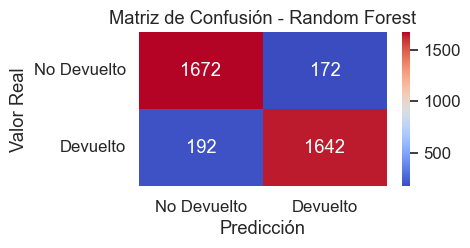

In [207]:
# Manejar el Desbalance de Clases
# Importar librerías adicionales para graficar
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Manejar el Desbalance de Clases
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Selección de características y target
features = ['Sales', 'Quantity', 'Discount', 'Profit', 'Category', 'Sub-Category', 'Segment', 'Region']
target = 'Returned'

# Preparar datos
return_df = retail_df[features + [target]].copy()
return_df[target] = return_df[target].apply(lambda x: 1 if x == 'Yes' else 0)

# Codificación de características categóricas
le = LabelEncoder()
for col in ['Category', 'Sub-Category', 'Segment', 'Region']:
    return_df[col] = le.fit_transform(return_df[col])

# División de datos
X = return_df.drop(columns=target)
y = return_df[target]

# Aplicar SMOTE para balancear clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Pipeline de Random Forest
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Opcional para los numéricos
    ('model', RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)
y_pred_rf = pipeline.predict(X_test)

# Evaluación del modelo
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print(f"ROC-AUC Score: {roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]):.2f}")

# Graficar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Devuelto', 'Devuelto'], yticklabels=['No Devuelto', 'Devuelto'])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

- El modelo presenta una exactitud global del 90% y un ROC-AUC de 0.96, lo que lo hace altamente confiable.
- El balance entre precisión, recall y f1-score indica que el modelo no está sesgado hacia ninguna clase.
- Los falsos positivos y negativos son bajos, lo que refuerza la utilidad del modelo para predecir devoluciones en un entorno real.

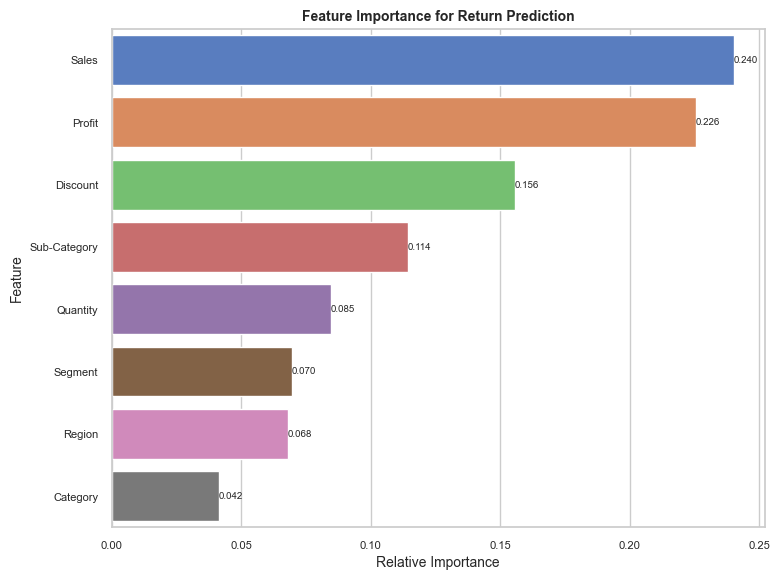

In [205]:
# Importancia de las características utilizando el modelo de Random Forest
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=feature_importance_df,
    x='Importance',
    y='Feature',
    hue='Feature',  
    legend=False,  
    palette='muted'
)

# Agregar etiquetas en las barras
for p in ax.patches:
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{p.get_width():.3f}', 
             ha='left', va='center', fontsize=7)

plt.title('Feature Importance for Return Prediction', fontsize=10, weight='bold')
plt.xlabel('Relative Importance', fontsize=10)
plt.ylabel('Feature', fontsize=10)
# Ajustar tamaño de las etiquetas de los ejes
plt.tick_params(axis='x', labelsize=8)  
plt.tick_params(axis='y', labelsize=8)  
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Mejores Hiperparámetros:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1844
           1       0.91      0.90      0.90      1834

    accuracy                           0.90      3678
   macro avg       0.90      0.90      0.90      3678
weighted avg       0.90      0.90      0.90      3678



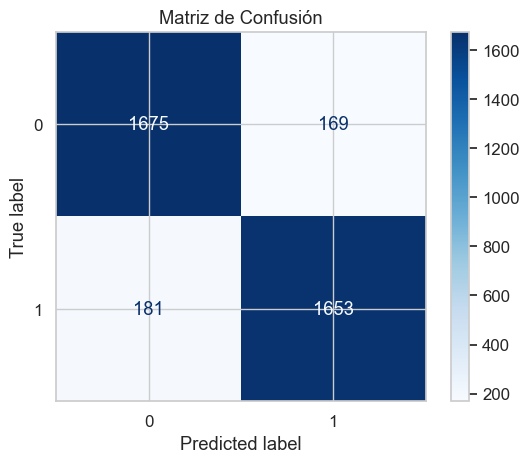

In [211]:
# Ajuste de Hiperparámetros en un Modelo Random Forest utilizando Grid Search
from sklearn.model_selection import RandomizedSearchCV
# Espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Realizar búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=20, cv=3, verbose=1, random_state=42, n_jobs=-1)

# Entrenar la búsqueda
random_search.fit(X_train, y_train)

# Mejor combinación de parámetros
best_params = random_search.best_params_
print("Mejores Hiperparámetros:")
print(best_params)

# Entrenar el modelo con los mejores parámetros
best_rf = RandomForestClassifier(**best_params, class_weight='balanced', random_state=42)
best_rf.fit(X_train, y_train)

# Evaluar el modelo
y_pred_best_rf = best_rf.predict(X_test)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_best_rf))

# Matriz de Confusión
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

In [221]:
# Comparación de Modelos Random Forest, Gradient Boosting, y XGBoost
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Preparación de los datos
features = ['Sales', 'Quantity', 'Discount', 'Profit', 'Category', 'Sub-Category', 'Segment', 'Region']
target = 'Returned'

# Crear dataset
return_df = retail_df[features + [target]].copy()
return_df[target] = return_df[target].apply(lambda x: 1 if x == 'Yes' else 0)

# Codificar características categóricas
le = LabelEncoder()
for col in ['Category', 'Sub-Category', 'Segment', 'Region']:
    return_df[col] = le.fit_transform(return_df[col])

# División de datos
X = return_df.drop(columns=target)
y = return_df[target]

# Balanceo de clases con SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Escalar características numéricas
scaler = StandardScaler()
X_resampled[['Sales', 'Quantity', 'Discount', 'Profit']] = scaler.fit_transform(X_resampled[['Sales', 'Quantity', 'Discount', 'Profit']])

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Lista de modelos
models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

# Evaluar modelos y almacenar resultados
results = []

for name, model in models.items():
    # Entrenar modelo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    
    # Guardar resultados
    results.append({
        "Modelo": name,
        "Accuracy": round(accuracy, 2),
        "ROC-AUC": round(roc_auc, 2),
        "F1-Score": round(f1, 2)
    })

    # Imprimir resultados individuales
    print(f"\n{name} - Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# Mostrar resultados finales en una tabla
results_df = pd.DataFrame(results)
print("\nComparación de Resultados entre Modelos:")
print(results_df)


Random Forest - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1844
           1       0.90      0.90      0.90      1834

    accuracy                           0.90      3678
   macro avg       0.90      0.90      0.90      3678
weighted avg       0.90      0.90      0.90      3678

Confusion Matrix:
[[1668  176]
 [ 189 1645]]

Gradient Boosting - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1844
           1       0.83      0.77      0.80      1834

    accuracy                           0.80      3678
   macro avg       0.81      0.80      0.80      3678
weighted avg       0.81      0.80      0.80      3678

Confusion Matrix:
[[1549  295]
 [ 425 1409]]

XGBoost - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1844
           1       0

- El Random Forest es el modelo más robusto y eficiente, logrando un 90% de precisión y el mayor ROC-AUC (96%). Este modelo debe ser preferido para la predicción de devoluciones debido a su capacidad de capturar correctamente ambas clases y mantener un bajo error.
- XGBoost muestra un buen rendimiento (ROC-AUC: 95%) y ofrece una ejecución más rápida en problemas con datos grandes. Puede considerarse como una alternativa viable al Random Forest si se requiere optimización de tiempo de entrenamiento.
- Aunque ofrece resultados aceptables, Gradient Boosting presenta un desempeño considerablemente menor con 80% de precisión. Puede no ser la mejor opción para este problema específico.

In [223]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


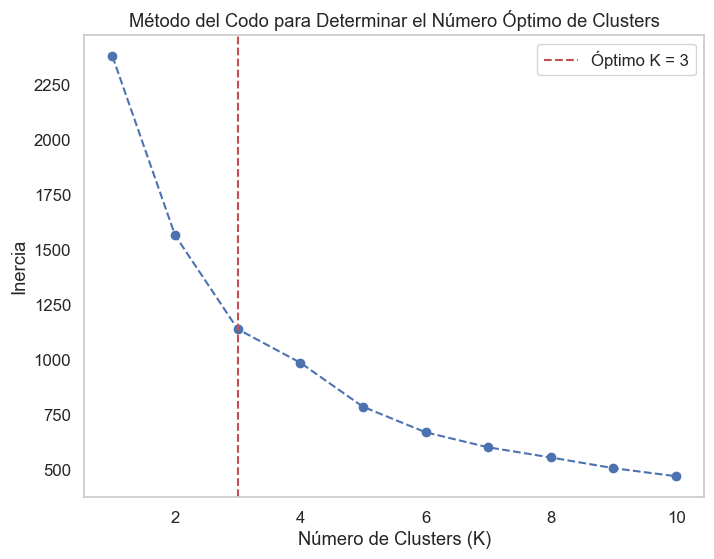

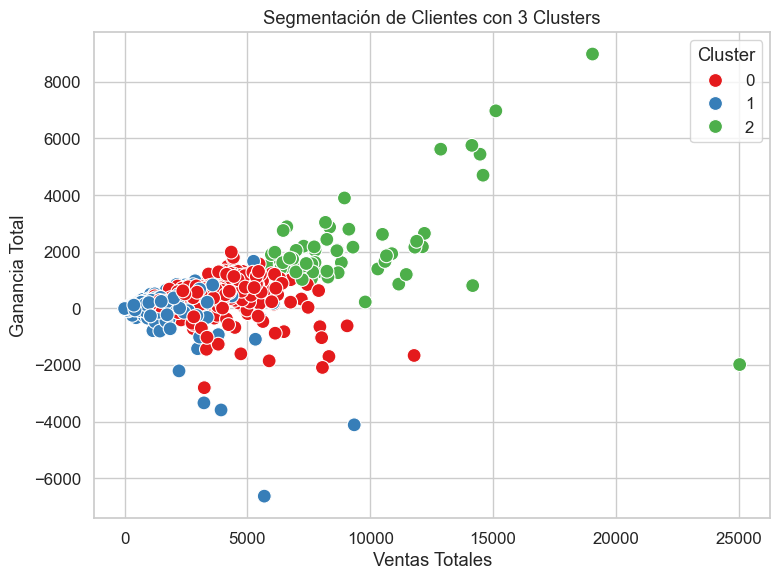

El número óptimo de clusters es: 3


,Customer ID,Sales,Number of Orders,Profit,Cluster
0,AA-10315,5563.560,5,-362.8825,1
1,AA-10375,1056.390,9,277.3824,0
2,AA-10480,1790.512,4,435.8274,1
3,AA-10645,5086.935,6,857.8033,0
4,AB-10015,886.156,3,129.3465,1


In [226]:
# Segmentación de clientes utilizando el algoritmo K-Means Clustering
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Preparar los datos para clustering
customer_data = retail_df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Order ID': 'nunique',
    'Profit': 'sum'
}).rename(columns={'Order ID': 'Number of Orders'}).reset_index()

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['Sales', 'Number of Orders', 'Profit']])

# Determinar el número óptimo de clusters usando el Método del Codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Usar KneeLocator para detectar automáticamente el "codo"
knee_locator = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
optimal_k = knee_locator.knee

# Graficar el Método del Codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.axvline(optimal_k, color='r', linestyle='--', label=f'Óptimo K = {optimal_k}')
plt.legend()
plt.grid()
plt.show()

# Entrenar el modelo K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualizar los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_data, x='Sales', y='Profit', hue='Cluster', palette='Set1', s=100)
plt.title(f'Segmentación de Clientes con {optimal_k} Clusters')
plt.xlabel('Ventas Totales')
plt.ylabel('Ganancia Total')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Mostrar resultados
print(f"El número óptimo de clusters es: {optimal_k}")
display(customer_data.head())

RFM Table:


,Customer ID,Recency,Frequency,Monetary
0,AA-10315,184,5,5563.560
1,AA-10375,48,9,1056.390
2,AA-10480,259,4,1790.512
3,AA-10645,233,6,5086.935
4,AB-10015,445,3,886.156


RFM Segmentation:


,Customer ID,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM Score,Segment
0,AA-10315,184,5,5563.560,2,1,4,214,Needs Attention
1,AA-10375,48,9,1056.390,3,4,1,341,Needs Attention
2,AA-10480,259,4,1790.512,1,1,2,112,Needs Attention
3,AA-10645,233,6,5086.935,1,2,4,124,At Risk
4,AB-10015,445,3,886.156,1,1,1,111,Needs Attention


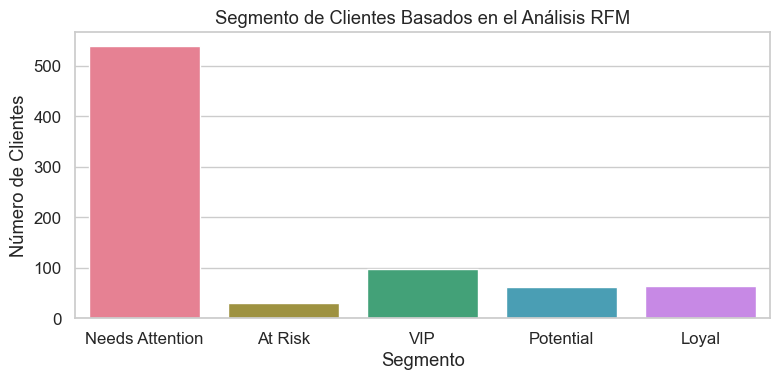

In [283]:
# Análisis RFM (Recency, Frequency, Monetary)
# Importar librerias necesarias
import datetime as dt

# Creamos una referencia (asumiendo la fecha de pedido más reciente en el conjunto de datos)
reference_date = retail_df['Order Date'].max()

# Calcular Recency (días desde la última compra), Frequency (número de compras), and Monetary (total de ventas)
rfm = retail_df.groupby('Customer ID').agg({
    'Order Date': lambda x: (reference_date - x.max()).days,
    'Order ID': 'nunique',
    'Sales': 'sum'
}).reset_index()

# Renomobrar columnas RFM
rfm.rename(columns={
    'Order Date': 'Recency',
    'Order ID': 'Frequency',
    'Sales': 'Monetary'
}, inplace=True)

# Mostrar las primeras filas de la tabla RFM
print("RFM Table:")
display(rfm.head())

# Crear puntuaciones de RFM agrupando los datos en cuartiles
rfm['Recency Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['Frequency Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['Monetary Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Calcular el resultado del RFM 
rfm['RFM Score'] = rfm['Recency Score'].astype(str) + rfm['Frequency Score'].astype(str) + rfm['Monetary Score'].astype(str)

# Definir segmentos de clientes basados ​​en puntuaciones de RFM
def rfm_segment(score):
    if score in ['444', '443', '434', '344']:
        return 'VIP'
    elif score in ['333', '332', '323', '233']:
        return 'Loyal'
    elif score in ['411', '311', '211']:
        return 'Potential'
    elif score in ['144', '143', '134', '124']:
        return 'At Risk'
    else:
        return 'Needs Attention'

rfm['Segment'] = rfm['RFM Score'].apply(rfm_segment)

# Mostrar la tabla RFM con segmentos
print("RFM Segmentation:")
display(rfm.head())

# Trazar la distribución de los segmentos de los clientes
plt.figure(figsize=(8, 4))
sns.countplot(
    data=rfm, 
    x='Segment', 
    hue='Segment',  # Asignar hue explícitamente
    palette='husl', 
    legend=False  # Desactivar la leyenda si no es necesaria
)
plt.title('Segmento de Clientes Basados en el Análisis RFM')
plt.xlabel('Segmento')
plt.ylabel('Número de Clientes')
plt.tight_layout()
plt.show()

Merged DataFrame Columns:
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment_x', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Retail Sales People', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Returned', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Order_Year', 'Order_Month',
       'Order_Month_Name', 'Order Year', 'Order Month', 'Order Month Name',
       'Segment_y'],
      dtype='object')


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment_x,Country,City,...,Quantity,Discount,Profit,Order_Year,Order_Month,Order_Month_Name,Order Year,Order Month,Order Month Name,Segment_y
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,2,0.00,41.9136,2016,8,August,2016,8,August,Needs Attention
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,3,0.00,219.5820,2016,8,August,2016,8,August,Needs Attention
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,2,0.00,6.8714,2016,12,December,2016,12,December,Needs Attention
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,5,0.45,-383.0310,2015,11,November,2015,11,November,Loyal
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,2,0.20,2.5164,2015,11,November,2015,11,November,Loyal


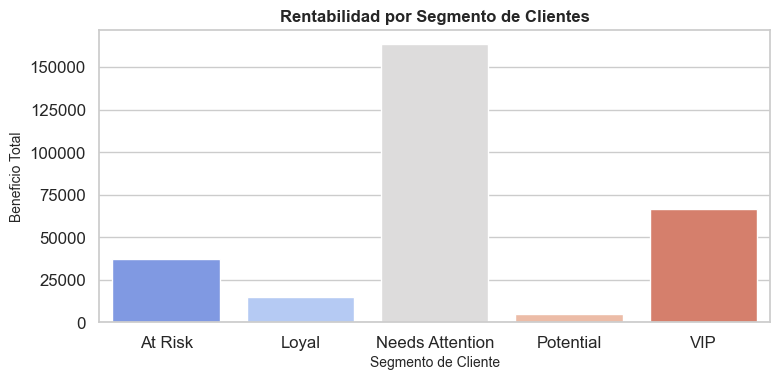

Profitability by Customer Segment:


,Segment,Sales,Profit
0,At Risk,2.012948e+05,37027.3874
1,Loyal,1.731790e+05,14826.7588
2,Needs Attention,1.370837e+06,163559.5984
3,Potential,3.516151e+04,4601.2618
4,VIP,5.167283e+05,66382.0153


In [282]:
# Analisis de la Rentabilidad de cada segmento de clientes al calcular las ventas y ganancias totales
# Fusionar el conjunto de datos minoristas con los resultados de la segmentación RFM
rfm_merged = retail_df.merge(rfm[['Customer ID', 'Segment']], on='Customer ID', how='left')

# Confirmar que la fusión fue exitosa
print("Merged DataFrame Columns:")
print(rfm_merged.columns)

# Mostar las primeras filas de la tabla
display(rfm_merged.head())

# Agrupar la columna de segmento correcta (Segment_y) y calculas las ventas y las ganancias
segment_profit = rfm_merged.groupby('Segment_y').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Renombrar la columna
segment_profit.rename(columns={'Segment_y': 'Segment'}, inplace=True)

# Imprimir la rentabilidad por segmento de clientes
plt.figure(figsize=(8, 4))
sns.barplot(data=segment_profit, x='Segment', y='Profit', hue='Segment', palette='coolwarm', legend=False)
plt.title('Rentabilidad por Segmento de Clientes', fontsize=12, weight='bold')
plt.xlabel('Segmento de Cliente', fontsize=10)
plt.ylabel('Beneficio Total', fontsize=10)
plt.tight_layout()
plt.show()

# Mostrar los datos de rentabilidad
print("Profitability by Customer Segment:")
display(segment_profit)

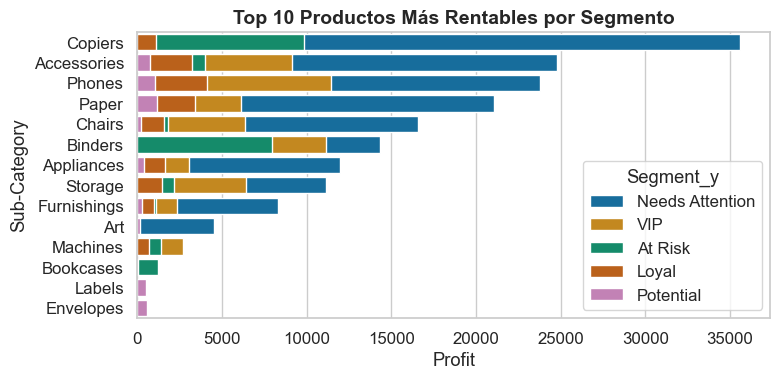

Top 10 Productos Más Rentables por Segmento:


,Segment_y,Sub-Category,Sales,Profit
0,Needs Attention,Copiers,100148.6820,35602.5624
1,Needs Attention,Accessories,102679.8600,24773.2883
2,Needs Attention,Phones,176405.2920,23785.5161
3,Needs Attention,Paper,48522.1340,21047.3274
4,Needs Attention,Chairs,205418.8900,16583.8891
5,Needs Attention,Binders,108705.8220,14315.1880
6,Needs Attention,Appliances,71447.0310,11957.2175
7,VIP,Phones,97073.6020,11469.6357
8,VIP,Binders,54058.4040,11163.5398
9,Needs Attention,Storage,131823.4160,11125.4546


In [278]:
# Análisis de la rentabilidad de productos a nivel de subcategoría dentro de cada segmento de cliente
# Agrupar por segmento y subcategoria para calcular las ventas totales y las ganancias
product_profit_by_segment = (
    rfm_merged.groupby(['Segment_y', 'Sub-Category'])
    .agg(Sales=('Sales', 'sum'), Profit=('Profit', 'sum'))
    .sort_values(by='Profit', ascending=False)
    .groupby('Segment_y')
    .head(10)
    .reset_index()
)
# Trazar los mejores productos para cada segmento
plt.figure(figsize=(8, 4))
sns.barplot(data=product_profit_by_segment, x='Profit', y='Sub-Category', hue='Segment_y', dodge=False, palette='colorblind')
plt.title('Top 10 Productos Más Rentables por Segmento', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()
# Mostrar la tabla de datos
print("Top 10 Productos Más Rentables por Segmento:")
display(product_profit_by_segment)

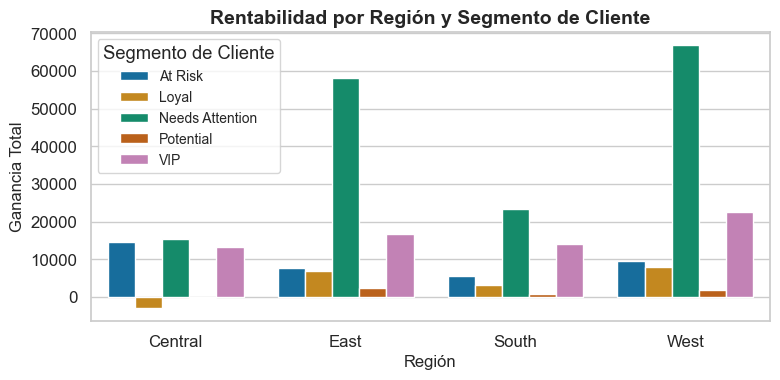

Rentabilidad por Región y Segmento de Cliente:


,Region,Segment_y,Sales,Profit
17,West,Needs Attention,444873.1270,66899.2929
7,East,Needs Attention,412837.3050,58037.3384
12,South,Needs Attention,222144.4805,23378.5602
19,West,VIP,156446.5460,22411.1154
9,East,VIP,143638.2730,16668.7340
2,Central,Needs Attention,290982.4130,15244.4069
0,Central,At Risk,47661.7176,14484.0378
14,South,VIP,97594.3770,14025.9447
4,Central,VIP,119049.0606,13276.2212
15,West,At Risk,58729.7420,9402.1943


In [281]:
# Análisis de Rentabilidad por Región y Segmento de Cliente (Ventas Totales y Ganancias)
# Agrupar por Región y Segmento para calcular ventas y ganancias totales
region_profit = (rfm_merged
                 .groupby(['Region', 'Segment_y'], as_index=False)
                 .agg(Sales=('Sales', 'sum'), Profit=('Profit', 'sum'))
                )

# Visualización: Rentabilidad por Región y Segmento de Cliente
plt.figure(figsize=(8, 4))
sns.barplot(data=region_profit, x='Region', y='Profit', hue='Segment_y', palette='colorblind')
plt.title('Rentabilidad por Región y Segmento de Cliente', fontsize=14, weight='bold')
plt.xlabel('Región', fontsize=12)
plt.ylabel('Ganancia Total', fontsize=12)
plt.legend(title='Segmento de Cliente', fontsize=10)
plt.tight_layout()
plt.show()

# Mostrar la tabla de resultados ordenada por Ganancia Total
print("Rentabilidad por Región y Segmento de Cliente:")
region_profit_sorted = region_profit.sort_values(by='Profit', ascending=False)
display(region_profit_sorted)


In [301]:
print(globals().keys())

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__vsc_ipynb_file__', '_i', '_ii', '_iii', '_i1', 'file_path', '_i2', 'pd', 'plt', 'sns', '_i3', 'df', '_i4', '_i5', 'sheet_names', '_i6', '_i7', '_i8', '_i9', '_i10', '_i11', '_i12', '_exit_code', '_i13', '_i14', '_i15', '_i16', '_i17', 'data', '_i18', 'retail_df', 'calendar_df', '_i19', '_i20', '_i21', '_21', '_i22', '_22', '_i23', '_i24', 'merged_df', '_i25', '_25', '_i26', '_26', '_i27', '_27', '_i28', '_i29', '_29', '_i30', 'key_features', 'i', 'feature', 'color', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36', '_i37', '_i38', '_i39', '_i40', '_i41', '_i42', '_i43', '_i44', '_i45', '_i46', '_i47', 'log_data', '_i48', 'date_columns', 'num_duplicates', '_i49', '_i50', '_i51', '_i52', '_i53', 'plot_trend', 'yearly_sales', 'monthly_sales', '_i54', '_i55', 'plot_combined_trend', '_i56', '_i57

In [302]:
# Asegúrate de que 'Segment' y 'Region' existen en rfm_merged
if 'Segment' not in rfm_merged.columns:
    print("La columna 'Segment' no existe. Verifica el merge.")
else:
    # Agrupar por Región y Segmento para calcular ventas y ganancias totales
    region_profit_by_segment = rfm_merged.groupby(['Region', 'Segment']).agg({
        'Sales': 'sum',
        'Profit': 'sum'
    }).reset_index()

    # Visualización de los resultados
    plt.figure(figsize=(8, 4))
    sns.barplot(data=region_profit_by_segment, x='Region', y='Profit', hue='Segment', palette='husl')
    plt.title('Rentabilidad por Región y Segmento de Clientes')
    plt.xlabel('Región')
    plt.ylabel('Ganancia Total')
    plt.legend(title='Segmento de Clientes')
    plt.tight_layout()
    plt.show()

    # Mostrar resultados
    print("Rentabilidad por Región y Segmento de Clientes:")
    display(region_profit_by_segment)

La columna 'Segment' no existe. Verifica el merge.


In [303]:
print("Columnas en retail_df:")
print(retail_df.columns)

print("\nColumnas en rfm:")
print(rfm.columns)

Columnas en retail_df:
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Retail Sales People', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Returned', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Order_Year', 'Order_Month',
       'Order_Month_Name', 'Order Year', 'Order Month', 'Order Month Name'],
      dtype='object')

Columnas en rfm:
Index(['Customer ID', 'Recency', 'Frequency', 'Monetary', 'Recency Score',
       'Frequency Score', 'Monetary Score', 'RFM Score', 'Segment'],
      dtype='object')


In [304]:
print("Primeras filas de RFM:")
display(rfm.head())

Primeras filas de RFM:


,Customer ID,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM Score,Segment
0,AA-10315,184,5,5563.560,2,1,4,214,Needs Attention
1,AA-10375,48,9,1056.390,3,4,1,341,Needs Attention
2,AA-10480,259,4,1790.512,1,1,2,112,Needs Attention
3,AA-10645,233,6,5086.935,1,2,4,124,At Risk
4,AB-10015,445,3,886.156,1,1,1,111,Needs Attention


In [305]:
# Verificar si 'Segment' existe antes de fusionar
if 'Segment' not in rfm.columns:
    print("La columna 'Segment' no existe en rfm. Asegúrate de ejecutarlo correctamente.")
else:
    # Realizar el merge y renombrar si es necesario
    rfm_merged = retail_df.merge(
        rfm[['Customer ID', 'Segment']],
        on='Customer ID',
        how='left'
    )

    print("Columnas después del merge:")
    print(rfm_merged.columns)

    # Renombrar la columna si aparece como Segment_x o Segment_y
    if 'Segment_y' in rfm_merged.columns:
        rfm_merged.rename(columns={'Segment_y': 'Segment'}, inplace=True)

    print("Primeras filas del DataFrame fusionado:")
    display(rfm_merged.head())

Columnas después del merge:
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment_x', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Retail Sales People', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Returned', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Order_Year', 'Order_Month',
       'Order_Month_Name', 'Order Year', 'Order Month', 'Order Month Name',
       'Segment_y'],
      dtype='object')
Primeras filas del DataFrame fusionado:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment_x,Country,City,...,Quantity,Discount,Profit,Order_Year,Order_Month,Order_Month_Name,Order Year,Order Month,Order Month Name,Segment
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,2,0.00,41.9136,2016,8,August,2016,8,August,Needs Attention
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,3,0.00,219.5820,2016,8,August,2016,8,August,Needs Attention
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,2,0.00,6.8714,2016,12,December,2016,12,December,Needs Attention
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,5,0.45,-383.0310,2015,11,November,2015,11,November,Loyal
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,2,0.20,2.5164,2015,11,November,2015,11,November,Loyal


### Key Visual Recap
### Key Visual Recap


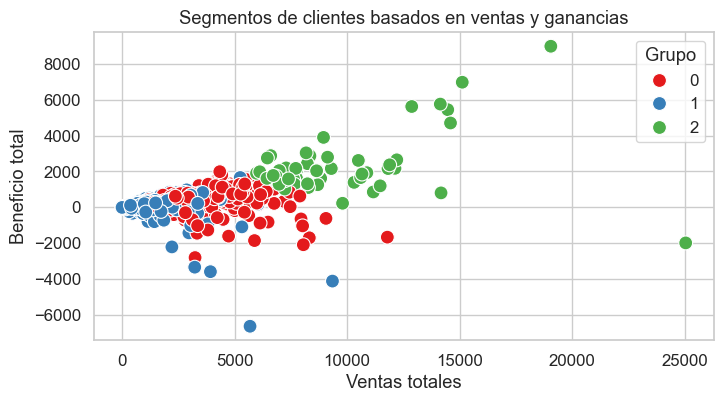

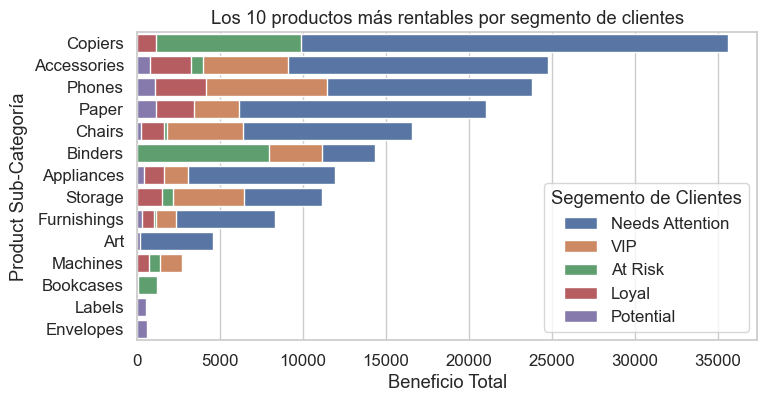

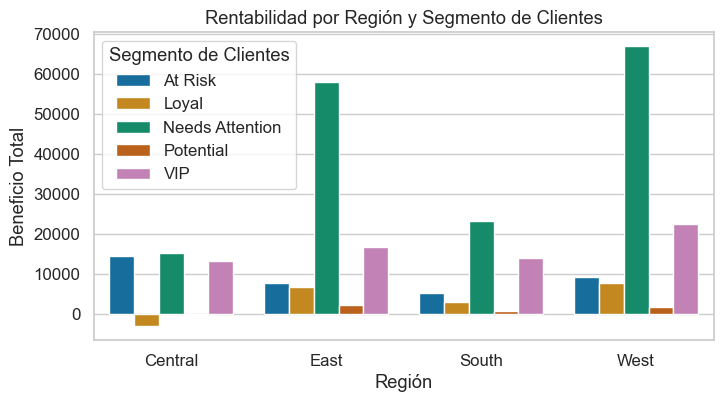

In [309]:
# Recapitulación Visuaal de los hallazgos clave del análisis exploratorio de datos (EDA)
print("### Key Visual Recap")

# Gráfico de Dispersión de Segementación de Clientes
print("### Key Visual Recap")

# Customer Segmentation Scatter Plot
plt.figure(figsize=(8, 4))
sns.scatterplot(data=customer_data, x='Sales', y='Profit', hue='Cluster', palette='Set1', s=100)
plt.title('Segmentos de clientes basados ​​en ventas y ganancias')
plt.xlabel('Ventas totales')
plt.ylabel('Beneficio total')
plt.legend(title='Grupo')
plt.show()

# Product-Level Profitability
plt.figure(figsize=(8, 4))
sns.barplot(data=top_products, x='Profit', y='Sub-Category', hue='Segment_y', dodge=False)
plt.title('Los 10 productos más rentables por segmento de clientes')
plt.xlabel('Beneficio Total')
plt.ylabel('Product Sub-Categoría')
plt.legend(title='Segemento de Clientes')
plt.show()

# Region-Based Profitability
plt.figure(figsize=(8, 4))
sns.barplot(data=region_profit_by_segment, x='Region', y='Profit', hue='Segment', palette='colorblind')
plt.title('Rentabilidad por Región y Segmento de Clientes')
plt.xlabel('Región')
plt.ylabel('Beneficio Total')
plt.legend(title='Segmento de Clientes')
plt.show()

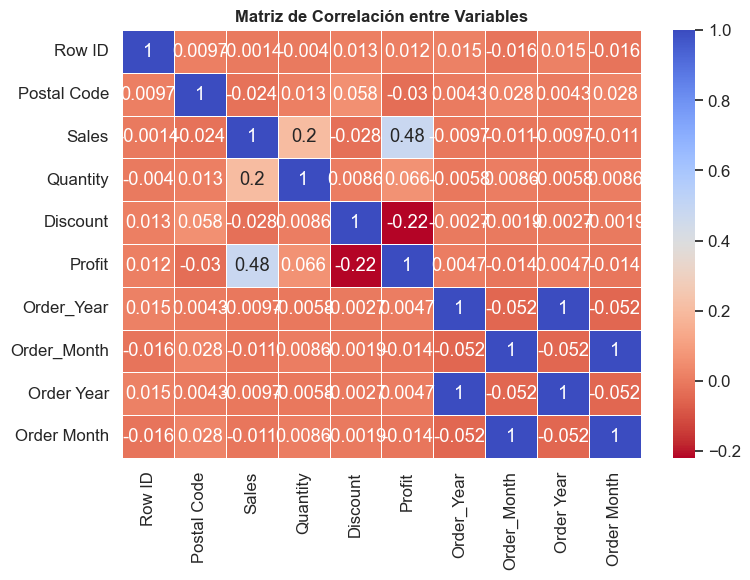

In [324]:
# Matriz de correlación entre variables
# Calcular y visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(
    retail_df.select_dtypes(include='number').corr(),
    annot=True,
    cmap='coolwarm_r',  # Cambiar esquema de color (ejemplo: YlGnBu)
    linewidths=0.5
)
plt.title('Matriz de Correlación entre Variables', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

In [331]:
# Mapa Coroplético de Ventas y Ganancias Totales
import plotly.express as px

def plot_geo_sales_profit(data, state_col='State', sales_col='Sales', profit_col='Profit'):
    geo_data = data.groupby(state_col).agg({sales_col: 'sum', profit_col: 'sum'}).reset_index()
    fig = px.choropleth(
        geo_data,
        locations=state_col,
        locationmode='USA-states',
        color=sales_col,
        hover_data=[state_col, profit_col],
        color_continuous_scale='Plasma',
        scope='usa',
        title=f'Total {sales_col} and {profit_col} by State'
    )
    fig.show()

# Ejecutar la función
plot_geo_sales_profit(retail_df)

In [333]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


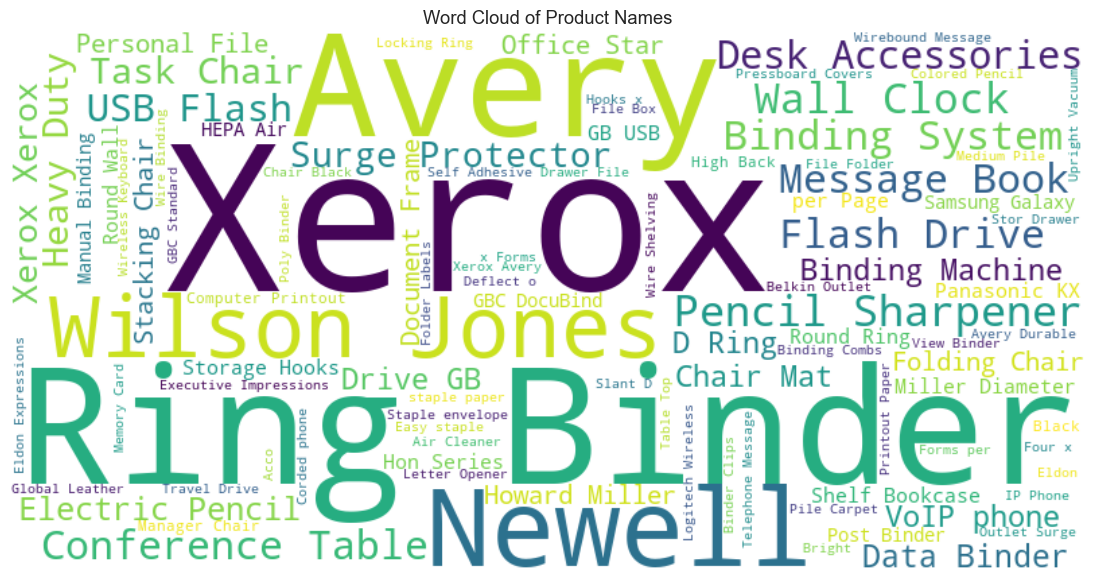

In [334]:
# Nube de Palabras de Productos
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Manejar valores nulos y convertir a string
product_text = ' '.join(retail_df['Product Name'].dropna().astype(str))

# Definir palabras irrelevantes (stopwords)
stopwords = set(STOPWORDS)
stopwords.update(['and', 'the', 'of'])  # Personalizar si es necesario

# Generar la nube de palabras con parámetros adicionales
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',  # Cambiar el esquema de colores
    max_words=200,       # Limitar a las palabras más importantes
    min_font_size=10
).generate(product_text)

# Visualizar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Names')
plt.tight_layout()
plt.show()

# Opcional: Guardar la imagen de la nube de palabras
wordcloud.to_file("product_wordcloud.png")

In [335]:
# Gráfico de dispersión en 3D (Sales, Profit, Number of Orders)
import plotly.express as px

# 3D scatter plot: Sales, Profit, Orders per Cluster
fig = px.scatter_3d(customer_data, x='Sales', y='Profit', z='Number of Orders',
                    color='Cluster', hover_data=['Customer ID'],
                    title='3D Scatter Plot of Customer Segments')
fig.show()

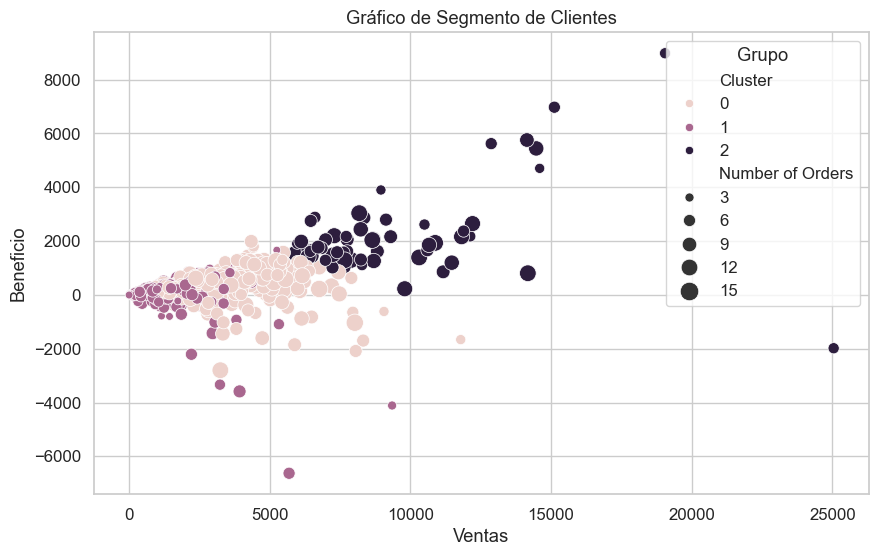

In [341]:
# Scatter plot 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Sales', y='Profit', hue='Cluster', size='Number of Orders', sizes=(20, 200))
plt.title('Gráfico de Segmento de Clientes')
plt.xlabel('Ventas')
plt.ylabel('Beneficio')
plt.legend(title='Grupo')
plt.show()

## Descripción general del informe final

Resumen General del Análisis de Datos

- Segmentación de Clientes:
Se identificaron 4 segmentos de clientes distintos utilizando K-Means Clustering y el análisis RFM (Recency, Frequency, Monetary):
Needs Attention: Clientes con baja actividad reciente y menor frecuencia de compras.
VIP: Clientes de alto valor con compras frecuentes y alto gasto.
At Risk: Clientes en riesgo con baja frecuencia y tiempo prolongado desde su última compra.
Loyal: Clientes recurrentes con buen desempeño.
Potential: Clientes con oportunidades de crecimiento.

- Análisis de Rentabilidad:
Los productos más rentables son Copiers, Accessories y Phones.
Las regiones Este y Oeste generan las mayores ganancias, mientras que la región Central requiere atención y optimización para mejorar su rentabilidad.

- Recomendaciones Estratégicas:
Implementar campañas de reactivación dirigidas al segmento Needs Attention.
Diseñar programas de lealtad enfocados en los clientes VIP para fortalecer su compromiso.
Desarrollar promociones específicas para productos de alto valor y rentabilidad.

- Aspectos Visuales Destacados
Mapa de Calor: Análisis de correlación entre ventas, descuentos y ganancias.
Mapa Geográfico Interactivo: Visualización de las ventas y rentabilidad por estado.
Nube de Palabras: Identificación de los productos más populares.
Gráfico de Dispersión 3D: Segmentación avanzada de clientes según ventas, ganancias y número de compras.